In [1]:
# Importing Packages with train data and reading all the feature in train data
import pandas as pd
import numpy as np
Data=pd.read_excel("Data_Train1.xlsx")
Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
#Import of test data
data_test=pd.read_excel("Test_set.xlsx")
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [3]:
# Finding the number of elements in train data
Data.shape

(10683, 11)

In [4]:
# Number of Rows x Columns in test data
data_test.shape

(2671, 10)

In [6]:
#Searching for missing values
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Finding exact location of Missing value in Route and Total Stop
Data[(Data.Route.isnull()|Data.Total_Stops.isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
Data['type']="train"

In [9]:
#Dropping all the missing values as it will not impact our Feature.
Data.dropna(inplace=True)

In [10]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
type               0
dtype: int64

In [11]:
Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


In [12]:
data_test['type']="test"

In [13]:
data_test.shape

(2671, 11)

In [14]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,type
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,test


In [15]:
#Merging Both Train Data and Test data to get new file"mergefile".
mergefile=pd.concat([Data,data_test],ignore_index=True,sort=False)

In [16]:
mergefile.shape

(13353, 12)

In [17]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [18]:
mergefile.Additional_Info.value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [19]:
#Data Mining or Feature Engineering has been started for Mergefile with creating new columns

mergefile["meal"]=1
mergefile.loc[mergefile.Additional_Info=="In-flight meal not included","meal"]=0

In [20]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1


In [21]:
mergefile["Low_cost"]=0
#mergefile.loc[mergefile.Airline=="Air India","Low_cost"]=1
mergefile.loc[mergefile.Airline=="IndiGo","Low_cost"]=1

In [22]:
mergefile.head(45)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train,1,0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,train,0,0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,train,1,0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,train,0,0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,train,1,0


In [23]:
mergefile.Date_of_Journey.value_counts()

18/05/2019    633
6/06/2019     630
12/06/2019    628
9/05/2019     628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     354
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
06/03/2019    123
03/03/2019    123
09/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

In [24]:
#Converting String to DateTime Type

import datetime as dt
from pandas import datetime
def parser(x):
      return datetime.strptime(x,"%d/%m/%Y").date()
mergefile.Date_of_Journey=mergefile.Date_of_Journey.apply(parser)

In [26]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,1,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1


In [27]:
#Creating New Feature "Dep_Hour" & "Dep_min" from Dep_Time from Pandas DateTime
mergefile["Dep_Hour"]=pd.to_datetime(mergefile.Dep_Time).dt.hour
mergefile["Dep_min"]=pd.to_datetime(mergefile.Dep_Time).dt.minute

In [28]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost,Dep_Hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,1,1,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1,16,50


In [29]:
# Extracting Numeric Value From String
mergefile['Total_Stops']=mergefile["Total_Stops"].replace("non-stop","0 stop")
mergefile["total_Stops"]=mergefile['Total_Stops'].str.split(" ").str[0]

In [30]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost,Dep_Hour,Dep_min,total_Stops
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,3897.0,train,1,1,22,20,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0,5,50,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0,9,25,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1,18,5,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1,16,50,1


In [31]:
duration=list(mergefile['Duration'])

In [32]:
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
mergefile['Duration_hours'] = dur_hours
mergefile['Duration_minutes'] =dur_minutes


In [33]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost,Dep_Hour,Dep_min,total_Stops,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,3897.0,train,1,1,22,20,0,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0,5,50,2,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0,9,25,2,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1,18,5,1,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1,16,50,1,4,45


In [37]:
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,meal,Low_cost,Dep_Hour,Dep_min,total_Stops,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,3897.0,train,1,1,22,20,0,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,1,0,5,50,2,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,1,0,9,25,2,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,1,1,18,5,1,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,1,1,16,50,1,4,45


In [38]:
mergefile.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'type', 'meal', 'Low_cost', 'Dep_Hour',
       'Dep_min', 'total_Stops', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [39]:
mergefile.Arrival_Time.value_counts()
mergefile['Arr_Time']=list(mergefile["Arrival_Time"].str[0:5])
mergefile['Arr_day']=list(mergefile['Arrival_Time'].str[6:])
mergefile.head()
mergefile["Day_of_Journey"]  = pd.to_datetime(mergefile.Date_of_Journey).dt.weekday
mergefile.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,meal,Low_cost,Dep_Hour,Dep_min,total_Stops,Duration_hours,Duration_minutes,Arr_Time,Arr_day,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,...,1,1,22,20,0,2,50,01:10,22 Mar,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,0,5,50,2,7,25,13:15,,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,1,0,9,25,2,19,0,04:25,10 Jun,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,1,1,18,5,1,5,25,23:30,,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,1,16,50,1,4,45,21:35,,4


In [43]:
# Separating Train and Test Data From Mergefile
train_data=mergefile.iloc[0:10682,:]
train_data.shape
test_data=mergefile.iloc[10682:,: ]
test_data.shape
test_data.shape

(2671, 22)

In [45]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'type', 'meal', 'Low_cost', 'Dep_Hour',
       'Dep_min', 'total_Stops', 'Duration_hours', 'Duration_minutes',
       'Arr_Time', 'Arr_day', 'Day_of_Journey'],
      dtype='object')

In [46]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'type', 'meal', 'Low_cost', 'Dep_Hour',
       'Dep_min', 'total_Stops', 'Duration_hours', 'Duration_minutes',
       'Arr_Time', 'Arr_day', 'Day_of_Journey'],
      dtype='object')

In [47]:
train_data.drop(labels="type",axis=1,inplace=True)

C:\Users\prade\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'meal', 'Low_cost', 'Dep_Hour', 'Dep_min',
       'total_Stops', 'Duration_hours', 'Duration_minutes', 'Arr_Time',
       'Arr_day', 'Day_of_Journey'],
      dtype='object')

In [49]:
# Price column has been droped from test data
test_data.drop(labels="Price",axis=1,inplace=True)

In [50]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'type', 'meal', 'Low_cost', 'Dep_Hour', 'Dep_min',
       'total_Stops', 'Duration_hours', 'Duration_minutes', 'Arr_Time',
       'Arr_day', 'Day_of_Journey'],
      dtype='object')

In [51]:
test_data.drop(labels="type",axis=1,inplace=True)

In [52]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,meal,Low_cost,Dep_Hour,Dep_min,total_Stops,Duration_hours,Duration_minutes,Arr_Time,Arr_day,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,...,1,1,22,20,0,2,50,01:10,22 Mar,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,0,5,50,2,7,25,13:15,,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,1,0,9,25,2,19,0,04:25,10 Jun,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,1,1,18,5,1,5,25,23:30,,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,1,16,50,1,4,45,21:35,,4


In [54]:
X=train_data.loc[:,('Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'meal', 'Low_cost', 'Dep_Hour', 'Dep_min',
       'total_Stops', 'Duration_hours', 'Duration_minutes', 'Arr_Time',
       'Arr_day', 'Day_of_Journey')]

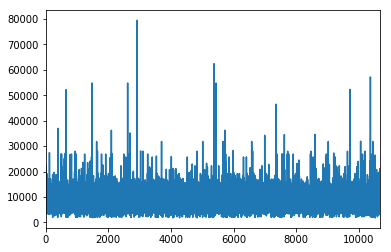

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
train_data["Price"].plot()

In [56]:
y=train_data.Price

In [57]:
X1=test_data.loc[:,['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'meal', 'Low_cost', 'Dep_Hour', 'Dep_min',
       'total_Stops', 'Duration_hours', 'Duration_minutes', 'Arr_Time',
       'Arr_day', 'Day_of_Journey']]

In [58]:
#Label Encoding of all categorical Data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
X.Airline=enc.fit_transform(X.Airline)
X.Date_of_Journey=enc.fit_transform(X.Date_of_Journey)
X.Arr_Time=enc.fit_transform(X.Arr_Time)
X.Arr_day=enc.fit_transform(X.Arr_day)
X.total_Stops=enc.fit_transform(X.total_Stops)
X.Source=enc.fit_transform(X.Source)
X.Destination=enc.fit_transform(X.Destination)
X.Route=enc.fit_transform(X.Route)
X.head(4)
X1.Airline=enc.fit_transform(X1.Airline)
X1.Date_of_Journey=enc.fit_transform(X1.Date_of_Journey)
X1.Arr_Time=enc.fit_transform(X1.Arr_Time)
X1.Arr_day=enc.fit_transform(X1.Arr_day)
X1.total_Stops=enc.fit_transform(X1.total_Stops)
X1.Source=enc.fit_transform(X1.Source)
X1.Destination=enc.fit_transform(X1.Destination)
X1.Route=enc.fit_transform(X1.Route)
X1.head()
X1.shape


(2671, 15)

In [161]:
# dividing the train into train data and test data,seleting the model for analysis
X_train=X.loc[:,['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'meal', 'Low_cost', 'Dep_Hour', 'Dep_min',
       'total_Stops', 'Duration_hours', 'Duration_minutes', 'Arr_Time',
       'Arr_day', 'Day_of_Journey']]
y_train=y

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
from sklearn.neighbors import KNeighborsRegressor 
model=KNeighborsRegressor(p=1,algorithm="kd_tree",n_neighbors = 5)
model.fit(X_train,y_train)


KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')

In [170]:
y_predict=model.predict(X_test)
print(y_predict)

[ 5356.  12283.4  9374.6 ...  6024.  14953.4  5638. ]


(2671,)

In [163]:
#Finding the RMSLE Score from The model

from sklearn.metrics import mean_squared_error,mean_squared_log_error
rmsle = 1- mean_squared_log_error(y_test,y_predict)**.5
print('\nrmsle',rmsle)



rmsle 0.7802395278839992
